https://arxiv.org/pdf/1411.3286.pdf

https://cosmohub.pic.es/

If you make use of the MICE mocks for scientific publications, we kindly ask you to cite the following papers:

"The MICE grand challenge lightcone simulation - I. Dark matter clustering". Fosalba, P.; Crocce, M.; Gaztañaga, E.; Castander, F. J., MNRAS, 448, 2987 (2015)

"The MICE Grand Challenge Lightcone Simulation II: Halo and Galaxy catalogues". Crocce, M.; Castander, F. J.; Gaztanaga, E.; Fosalba, P.; Carretero, J., MNRAS, 453, 1513 (2015)

"The MICE Grand Challenge light-cone simulation - III. Galaxy lensing mocks from all-sky lensing maps". Fosalba, P.; Gaztañaga, E.; Castander, F. J.; Crocce, M., MNRAS, 447, 1319 (2015)

"An algorithm to build mock galaxy catalogues using MICE simulations". Carretero, J.; Castander, F. J.; Gaztañaga, E.; Crocce, M.; Fosalba, P., MNRAS, 447, 646 (2015)

"Measuring the growth of matter fluctuations with third-order galaxy correlations", Hoffmann K., Bel J., Gaztanaga E., Crocce M., Fosalba P., Castander F.J., MNRAS, 447, 1724 (2015)



# Euclid Filter

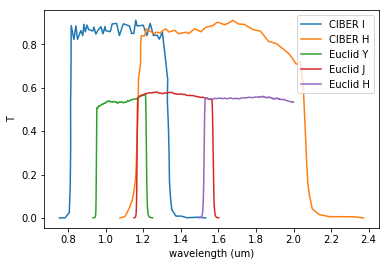

In [65]:
filtdir = '/Users/ytcheng/ciber/lephare/lephare_dev/filt/'

for band in ['I','H']:
    d = np.loadtxt(filtdir + 'ciber/' + band + '.pb',skiprows=1)
    plt.plot(d[:,0]/1e4,d[:,1],label='CIBER '+band)
for band in ['Y','J','H']:
    d = np.loadtxt(filtdir + 'euclid/Euclid_NISP.' + band + '.pb',skiprows=0)
    plt.plot(d[:,0]/1e4,d[:,1],label='Euclid '+band)
plt.xlabel('wavelength (um)')
plt.ylabel('T')
plt.legend()
plt.savefig('/Users/ytcheng/Desktop/micecat_filter.png',
             dpi = 100, bbox_inches='tight')

# MICECAT statistics

MICECAT field 0, 0 < ra < 2, 0 < dec < 2
Ngal=189, Ncent = 151 (79.89 %), Nsat=38 (20.11 %)
Ngal=845, Ncent = 565 (66.86 %), Nsat=280 (33.14 %)
Ngal=3085, Ncent = 1994 (64.64 %), Nsat=1091 (35.36 %)
Ngal=8846, Ncent = 5598 (63.28 %), Nsat=3248 (36.72 %)


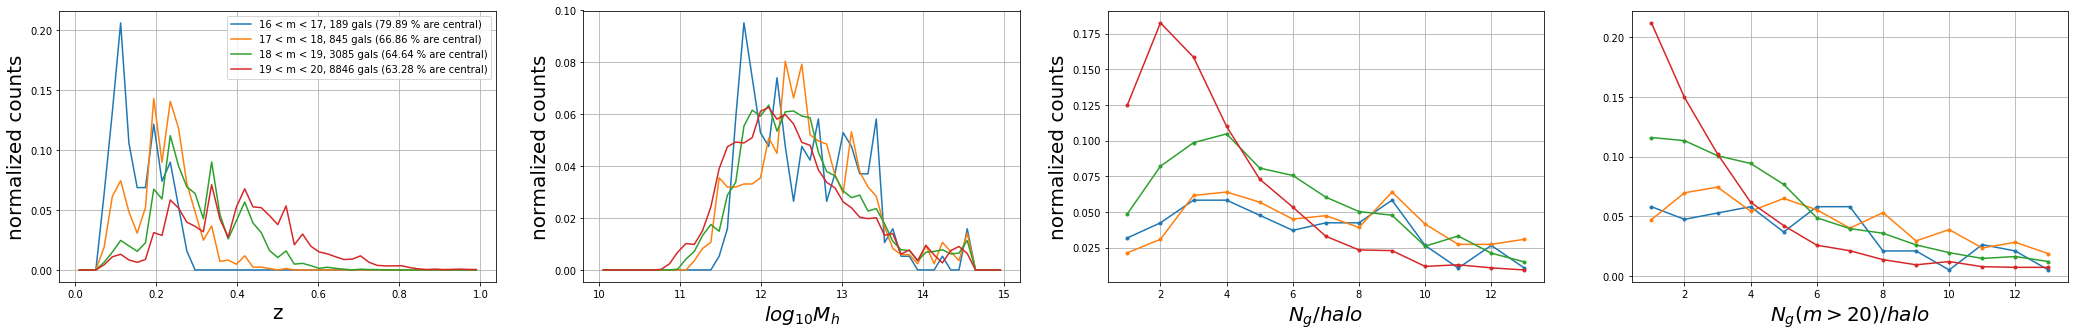

In [18]:
from micecat import *

icat = 0
df = get_micecat_df(icat)

fig, ax = plt.subplots(1, 4, figsize = (36,5))

zbinedges = np.linspace(0,1,50)
zbins = (zbinedges[1:] + zbinedges[:-1])/2
Mhbinedges = np.linspace(10,15,50)
Mhbins = (Mhbinedges[1:] + Mhbinedges[:-1])/2
Ngbinedges = np.arange(1,15,1) - 0.5
Ngbins = (Ngbinedges[1:] + Ngbinedges[:-1])/2
for i,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    dfi = df[(df['I']>=m_min) & (df['I']<m_max)]
    Ng = len(dfi)
    Ncen = len(dfi[dfi['flag_central']==0]) 
    Nsat = len(dfi[dfi['flag_central']==1]) 
    
    histz,_ = np.histogram(dfi['z_cgal'], bins=zbinedges)
    histMh,_ = np.histogram(dfi['lmhalo'], bins=Mhbinedges)
    
    Nunmasked, Ninhalo = [], []
    for haloid in dfi['unique_halo_id']:
        dfj = df[df['unique_halo_id']==haloid]
        Nunmasked.append(len(dfj[(dfj['I']>20)]))
        Ninhalo.append(len(dfj))
    Nunmasked = np.array(Nunmasked)
    Ninhalo = np.array(Ninhalo)
    
    histNinhalo,_ = np.histogram(Ninhalo,bins=Ngbinedges)
    histunmasked,_ = np.histogram(Nunmasked,bins=Ngbinedges)

    ax[0].plot(zbins,histz/Ng, label='%d < m < %d, %d gals (%.2f %% are central)'\
               %(m_min, m_max, Ng, Ncen/Ng*100))
    ax[1].plot(Mhbins,histMh/Ng)
    ax[2].plot(Ngbins,histNinhalo/Ng,'.-')
    ax[3].plot(Ngbins,histunmasked/Ng,'.-')
    print('Ngal=%d, Ncent = %d (%.2f %%), Nsat=%d (%.2f %%)'\
          %(Ng,Ncen,Ncen/Ng*100,Nsat,Nsat/Ng*100))

ax[0].legend()
ax[0].set_xlabel('z', fontsize=20)
ax[0].set_ylabel('normalized counts', fontsize=20)
ax[1].set_xlabel(r'$log_{10}M_h$', fontsize=20)
ax[1].set_ylabel('normalized counts', fontsize=20)
ax[2].set_ylabel('normalized counts', fontsize=20)
ax[2].set_xlabel(r'$N_g/halo$', fontsize=20)
ax[2].set_ylabel('normalized counts', fontsize=20)
ax[3].set_xlabel(r'$N_g(m>20)/halo$', fontsize=20)
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
# fig.savefig('/Users/ytcheng/Desktop/micecat.png',
#              dpi = 100, bbox_inches='tight')

In [66]:
from micecat import *

icat = 0
df = get_micecat_df(icat)
df = df.sort_values(by=['unique_halo_id'])
df['fluxI'] = ABmag2Fjy(df['I'].values)
df['fluxH'] = ABmag2Fjy(df['H'].values)

dfc = df[df['flag_central']==0]

fluxItot = []
fluxHtot = []
davg, dmax = [], []

for i, haloid in enumerate(dfc['unique_halo_id']):
    
    dfi = df[df['unique_halo_id']==haloid]
    if np.all(dfi['flag_central']==1):
        continue
        
    fluxItot.append(np.sum(dfi['fluxI']))
    fluxHtot.append(np.sum(dfi['fluxH']))
    
    xc,yc = dfc.iloc[i]['x'], dfc.iloc[i]['y']
    dx, dy = dfi['x'].values - xc, dfi['y'].values - yc
    d = np.sort(np.sqrt((dx**2 + dy**2)))[1:]
    if len(d) == 0:
        davg.append(0)
        dmax.append(0)
    else:
        davg.append(np.mean(d))
        dmax.append(np.max(d))
    if i%1000 == 0:
        print(i, len(np.unique(df['unique_halo_id'])))

fluxItot = np.array(fluxItot)
fluxHtot = np.array(fluxHtot)
davg = np.array(davg)*7
dmax = np.array(dmax)*7

dfc['fluxItot'] = fluxItot
dfc['fluxHtot'] = fluxHtot
dfc['davg'] = davg
dfc['dmax'] = dmax

clear_output()

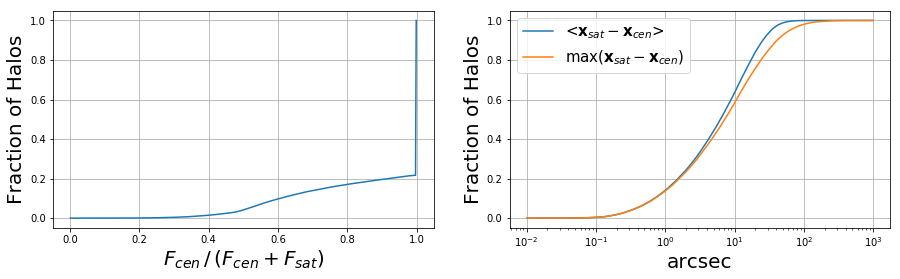

In [67]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
fbinedges = np.linspace(0,1,500)
fbins = (fbinedges[1:] + fbinedges[:-1]) / 2
histf,_ = np.histogram(dfc['fluxI']/dfc['fluxItot'], bins=fbinedges)
histf =  histf / len(dfc)
ax[0].plot(fbins,np.cumsum(histf))
ax[0].set_xlabel('$F_{cen}\,/\,(F_{cen}+F_{sat})$', fontsize=20)
ax[0].set_ylabel('Fraction of Halos', fontsize=20)
ax[0].grid()

davg, dmax = dfc['davg'].values, dfc['dmax'].values
davg, dmax = davg[davg>0], dmax[dmax>0]

dbinedges = np.logspace(-2,3,500)
dbins = np.sqrt(dbinedges[1:] * dbinedges[:-1])

histdavg,_ = np.histogram(davg, bins=dbinedges)
histdavg =  histdavg / len(davg)
ax[1].semilogx(dbins,np.cumsum(histdavg), label=r'<$\mathbf{x}_{sat}-\mathbf{x}_{cen}$>')

histdmax,_ = np.histogram(dmax, bins=dbinedges)
histdmax =  histdmax / len(dmax)
ax[1].semilogx(dbins,np.cumsum(histdmax), label=r'max($\mathbf{x}_{sat}-\mathbf{x}_{cen}$)')

ax[1].set_xlabel('arcsec', fontsize=20)
ax[1].set_ylabel('Fraction of Halos', fontsize=20)
ax[1].grid()
ax[1].legend(fontsize=15)

fig.savefig('/Users/ytcheng/Desktop/micecat_Fcen.png',
             dpi = 100, bbox_inches='tight')

In [117]:
# from micecat import *

# Rvbinedges = np.logspace(-1,1,50)
# Rvbins = (Rvbinedges[1:] + Rvbinedges[:-1])/2
# Rabinedges = np.logspace(1,3.2,50)
# Rabins = (Rabinedges[1:] + Rabinedges[:-1])/2
# histRv = np.zeros([4,len(Rvbins)])
# histRa = np.zeros([4,len(Rabins)])

# for icat in range(90):
#     df = get_micecat_df(icat)

#     z_arr = np.array(df['z_cgal'])
#     Mh_arr = 10**np.array(df['lmhalo'])
#     rhoc_arr = np.array(cosmo.critical_density(z_arr).to(u.M_sun / u.Mpc**3))
#     rvir_arr = ((3 * Mh_arr) / (4 * np.pi * 200 * rhoc_arr))**(1./3)
#     DA_arr = np.array(cosmo.comoving_distance(z_arr))
#     rvir_ang_arr = (rvir_arr / DA_arr) * u.rad.to(u.arcsec)
#     df['Rv_Mpc'] = rvir_arr
#     df['Rv_arcsec'] = rvir_ang_arr

#     for i,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
#         dfi = df[(df['I']>=m_min) & (df['I']<m_max)]

#         histRvi,_ = np.histogram(dfi['Rv_Mpc'], bins=Rvbinedges)
#         histRai,_ = np.histogram(dfi['Rv_arcsec'], bins=Rabinedges)
#         histRv[i,:] += histRvi
#         histRa[i,:] += histRai

# clear_output()

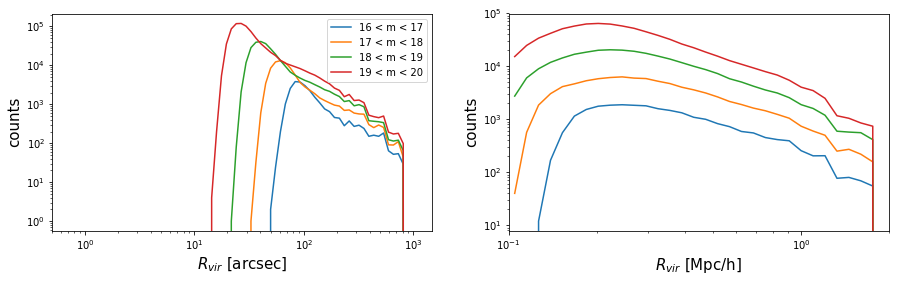

In [125]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
for i,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    ax[0].loglog(Rabins, histRa[i,:], label='%d < m < %d'%(m_min, m_max))
    ax[1].loglog(Rvbins, histRv[i,:], label='%d < m < %d'%(m_min, m_max))

ax[0].legend()
ax[0].set_xlabel(r'$R_{vir}$ [arcsec]', fontsize=15)
ax[0].set_ylabel('counts', fontsize=15)
ax[1].set_xlabel(r'$R_{vir}$ [Mpc/h]', fontsize=15)
ax[1].set_ylabel('counts', fontsize=15)
ax[0].set_xlim([5e-1,1.5e3])
ax[1].set_xlim([1e-1,2])
fig.savefig('/Users/ytcheng/Desktop/micecat_rvir.png',
             dpi = 150, bbox_inches='tight')

# Stack 1-Halo

In [1]:
from micecat import *

In [ ]:
# inst = 1
# for icat in range(90):
#     data_dict = run_micecat_1h(inst, icat)
# for ibatch in range(9):
#     run_micecat_batch(inst, ibatch, run_type='1h')

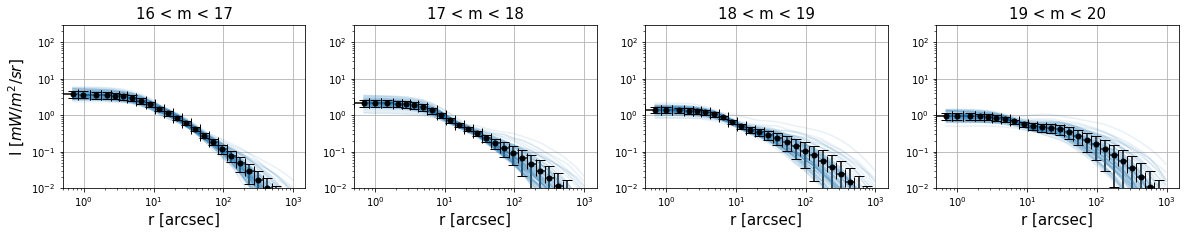

In [62]:
inst = 1

fig, ax = plt.subplots(1,4,figsize=(20,3))
for im, (m_min, m_max) in enumerate(zip(magbindict['m_min'], magbindict['m_max'])):
    rbins, data_avg, data_std, data_all = get_micecat_sim_1h(inst, im, sub=False)
    
    for icat in range(data_all.shape[0]):
        ax[im].loglog(rbins,data_all[icat],alpha=0.1,c='C0')
    
    plot_err_log(rbins, data_avg, data_std,
         ax=ax[im], color='k',label='Average Excess')
    ax[im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
    ax[im].set_xlabel('r [arcsec]', fontsize=15)
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([5e-1,1.5e3])
    ax[im].grid()
ax[0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
fig.savefig('/Users/ytcheng/Desktop/micecat_1h.png',
             dpi = 150, bbox_inches='tight')

# Stack only central gals

In [1]:
from micecat import *

In [3]:
# inst = 1
# for icat in range(90):
#     data_dict = run_micecat_fliter_test_cen(inst, icat)

# inst = 1
# for ibatch in range(9):
#     run_micecat_batch(inst, ibatch, run_type='cen')

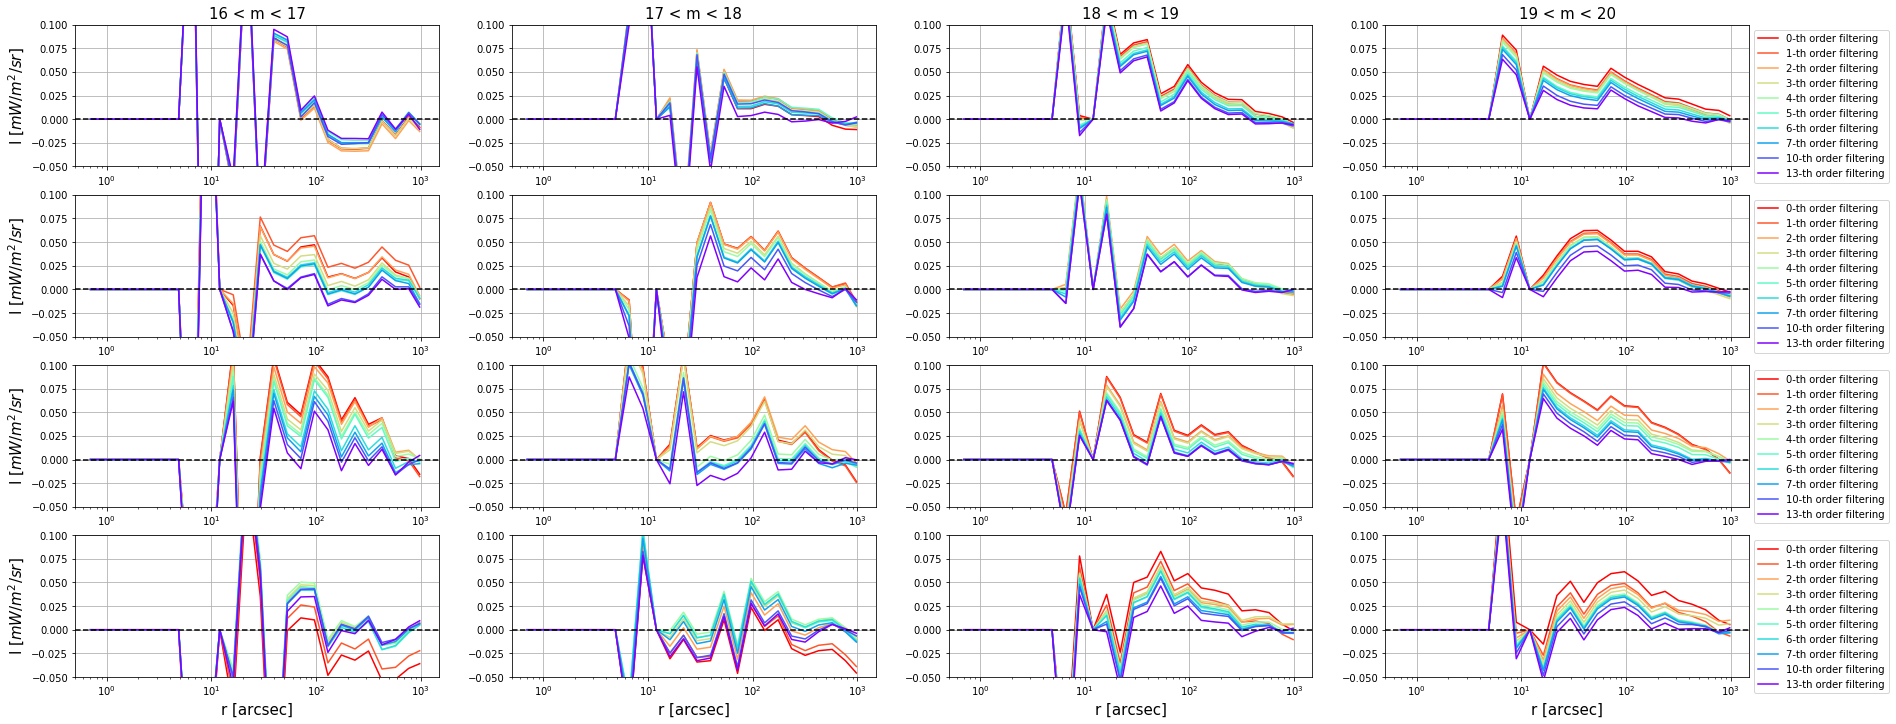

In [58]:
import matplotlib.cm as cm

inst = 1
fig, ax = plt.subplots(4,4,figsize=(30,12))
for ii,icat in enumerate([0,20,40,80]):    
    for im, (m_min, m_max) in enumerate(zip(magbindict['m_min'], magbindict['m_max'])):
        rbins, _, _, data_all, filt_order_arr, icat_arr =\
        get_micecat_sim_cen(1,im, return_icat=True)
        colors = cm.rainbow(np.linspace(1, 0, len(filt_order_arr)))
        for ifilt, (filt_order, c) in enumerate(zip(filt_order_arr, colors)):
            ax[ii][im].semilogx(rbins,data_all[np.where(icat_arr==icat)[0][0]][ifilt],c=c,
                           label='%d-th order filtering'%filt_order)
        ax[ii][im].axhline(0, c='k', ls='--')
        ax[ii][im].set_ylim([-0.05,0.1])
        ax[ii][im].set_xlim([5e-1,1.5e3])
        ax[ii][im].grid()
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[-1][im].set_xlabel('r [arcsec]', fontsize=15)
    ax[ii][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[ii][-1].legend(bbox_to_anchor=(1, 1))
fig.savefig('/Users/ytcheng/Desktop/micecat_filter_cen_i.png',
             dpi = 150, bbox_inches='tight')

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in true_divide


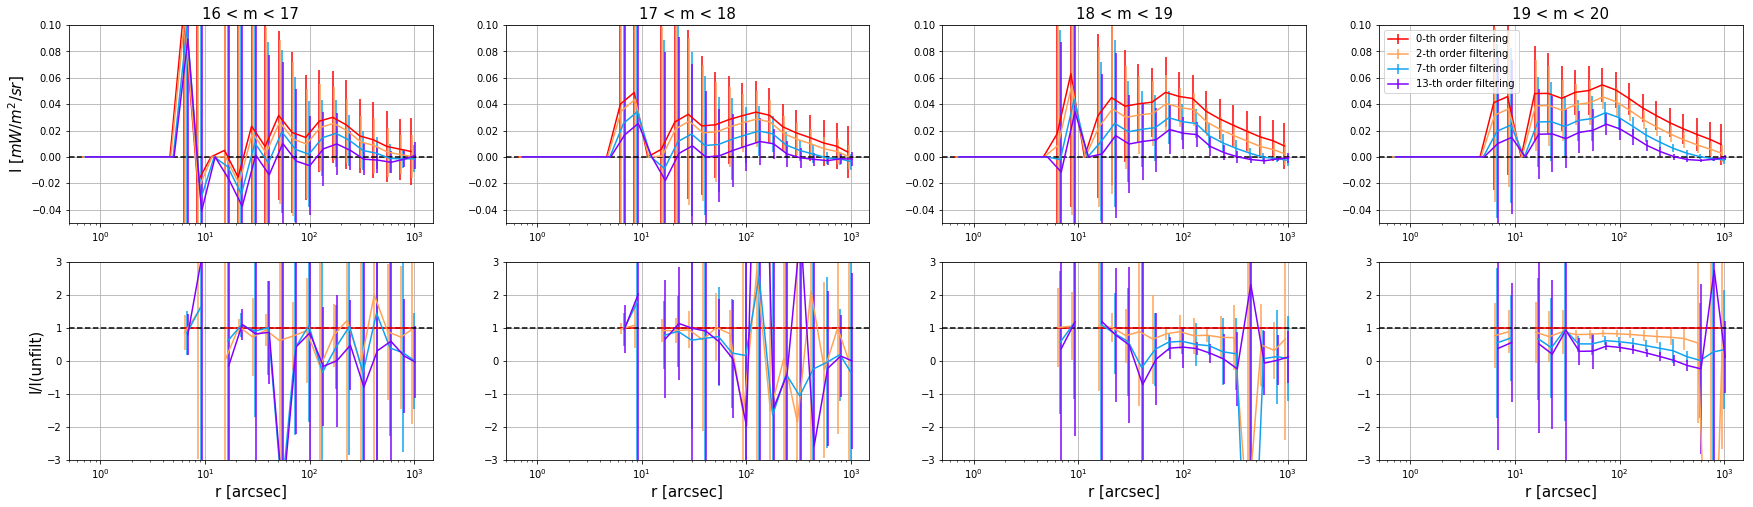

In [61]:
inst = 1
fig, ax = plt.subplots(2,4,figsize=(30,8))
for im, (m_min, m_max) in enumerate(zip(magbindict['m_min'], magbindict['m_max'])):
    rbins, data_avg, data_std, data_all, filt_order_arr = get_micecat_sim_cen(inst, im, ratio=False)
    _, data_avg_r, data_std_r, _, _ = get_micecat_sim_cen(inst, im, ratio=True)
    for ifilt, (filt_order, c) in enumerate(zip(filt_order_arr, colors)):
        if filt_order not in [0,2,7,13]:
            continue
        xoff = (ifilt - len(filt_order_arr)/2)*0.01 + 1
        ax[0][im].errorbar(rbins*xoff,data_avg[ifilt], data_std[ifilt],c=c,
                       label='%d-th order filtering'%filt_order)
        ax[1][im].errorbar(rbins*xoff,data_avg_r[ifilt], data_std_r[ifilt],c=c,
                       label='%d-th order filtering'%filt_order)
            
    ax[0][im].set_xscale('log')
    ax[0][im].axhline(0, c='k', ls='--')
    ax[0][im].set_ylim([-0.05,0.1])
    ax[0][im].set_xlim([5e-1,1.5e3])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
    ax[1][im].set_xscale('log')
    ax[1][im].axhline(1, c='k', ls='--')
    ax[1][im].set_ylim([-3,3])
    ax[1][im].set_xlim([5e-1,1.5e3])
    ax[1][im].grid()
    ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
ax[1][0].set_ylabel('I/I(unfilt)', fontsize=15)
ax[0][-1].legend()
fig.savefig('/Users/ytcheng/Desktop/micecat_filter_cen.png',
             dpi = 150, bbox_inches='tight')

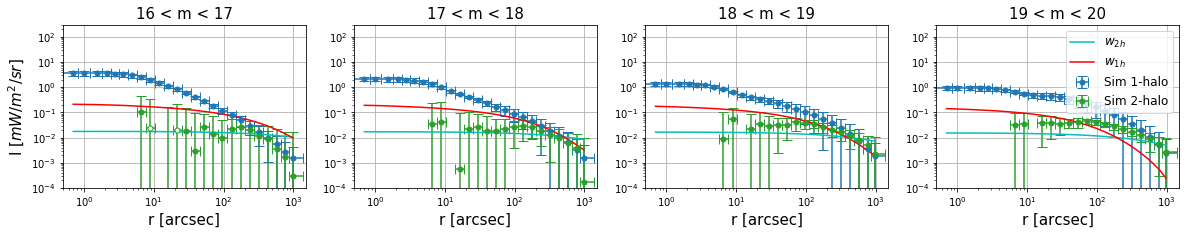

In [24]:
from stack import *
from clustering import *
from utils import *
from micecat import *

for inst in [1]:
    fig, ax = plt.subplots(1, 4, figsize = (20,3))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        stackdat = stacking(inst, 4, m_min, m_max, 
                            load_from_file=True,BGsub=False).stackdat
        
        _, mc_avg, mc_std, _ = get_micecat_sim_1h(inst, im, sub=False)
        plot_err_log(stackdat['rbins'], 
                 mc_avg, mc_std,
                 ax=ax[im], color='C0',label='Sim 1-halo')
        
        _, mc_avg, mc_std, _ = get_micecat_sim_cen(inst, im, filt_order=2, sub=False)
        plot_err_log(stackdat['rbins'], 
                 mc_avg, mc_std,
                 ax=ax[im], color='C2',label='Sim 2-halo')

        cat_data = get_catalog(inst, ifield, im)
        w2h_arr = wgI(cat_data['z'], stackdat['rbins'], linear=True)
        wnlin_arr = wgI(cat_data['z'], stackdat['rbins'], linear=False)
        w1h_arr = wnlin_arr - w2h_arr
        
        ax[im].loglog(stackdat['rbins'], w2h_arr,'c',label=r'$w_{2h}$')
        ax[im].loglog(stackdat['rbins'], w1h_arr,'r',label=r'$w_{1h}$')
        
        ax[im].set_ylim([1e-4,3e2])
        ax[im].set_xlim([5e-1,1.5e3])
        ax[im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[im].grid()    
        ax[im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[-1].legend(fontsize=12)
fig.savefig('/Users/ytcheng/Desktop/clus_models.png',
             dpi = 150, bbox_inches='tight')

# Run map filtering test

In [1]:
from micecat import *

In [3]:
# inst = 1
# for icat in range(90):
#     data_dict = run_micecat_fliter_test(inst, icat)
# for ibatch in range(9):
#     run_micecat_batch(inst, ibatch)

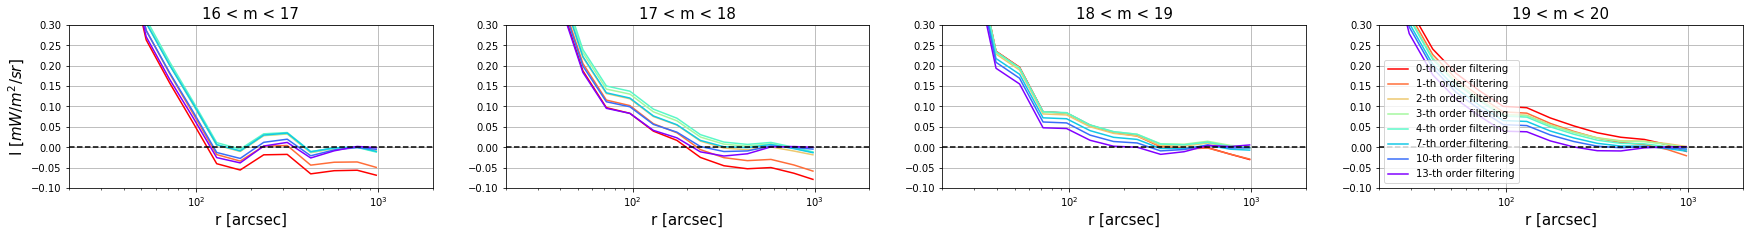

In [126]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(1, 0, len(filt_order_arr)))

inst = 1
savedir = './micecat_data/'
for icat in np.arange(0,90,10):
    fname  = savedir + 'filter_test_TM%d_icat%d.pkl'%(inst, icat)

    with open(fname,"rb") as f:
        data_dict = pickle.load(f)
    
    filt_order_arr = data_dict['filt_order_arr']
    rbins = data_dict['rbins']
    data = data_dict['data']
    
    plt.close()
    fig, ax = plt.subplots(1,4,figsize=(30,3))
    for im, (m_min, m_max) in enumerate(zip(magbindict['m_min'], magbindict['m_max'])):
        for ifilt, (filt_order, c) in enumerate(zip(filt_order_arr, colors)):
            ax[im].semilogx(rbins, data[ifilt, im],c=c,label='%d-th order filtering'%filt_order)
        ax[im].axhline(0, c='k', ls='--')
        ax[im].set_ylim([-0.1,0.3])
        ax[im].set_xlim([2e1,2e3])
        ax[im].grid()
        ax[im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[im].set_xlabel('r [arcsec]', fontsize=15)
    ax[0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[-1].legend()
    fig.savefig('/Users/ytcheng/Desktop/micecat_filter_icat%d.png'%icat,
                 dpi = 150, bbox_inches='tight')
    

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide


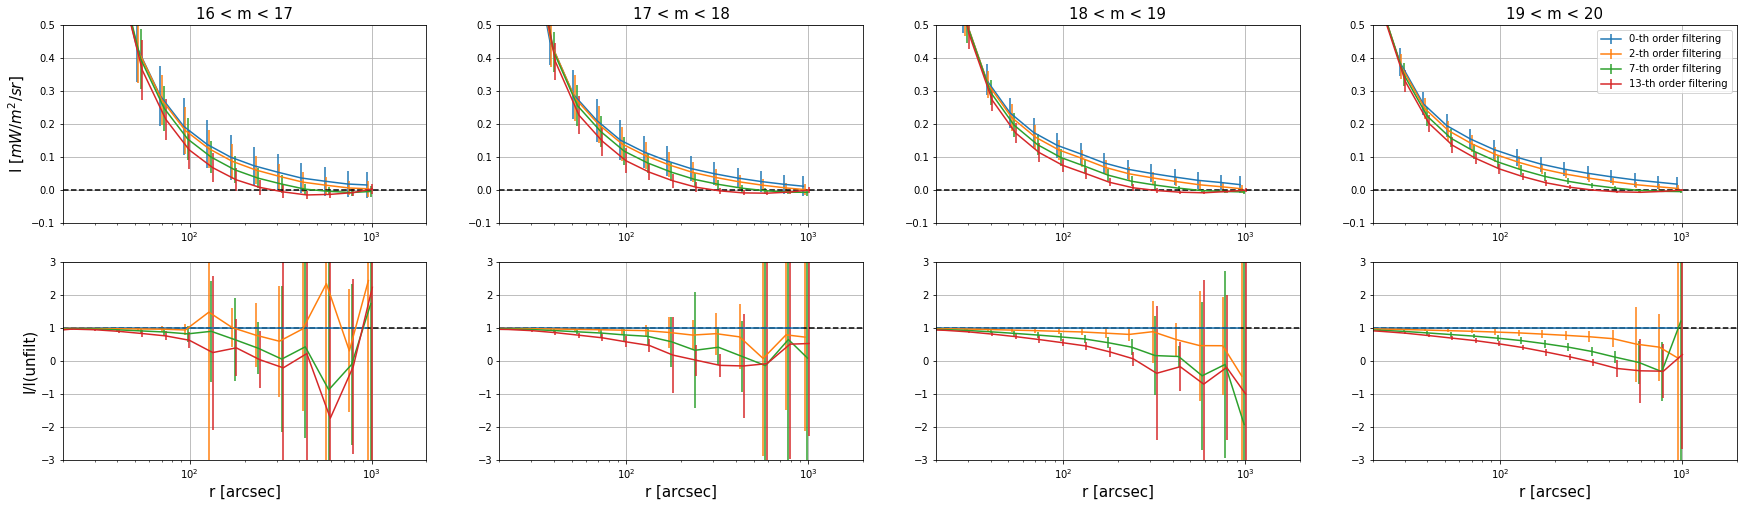

In [22]:
inst = 1
savedir = './micecat_data/'

data_all = []
for icat in range(90):
    fname  = savedir + 'filter_test_TM%d_icat%d.pkl'%(inst, icat)

    with open(fname,"rb") as f:
        data_dict = pickle.load(f)
    
    filt_order_arr = np.array(data_dict['filt_order_arr'])
    rbins = np.array(data_dict['rbins'])
    data = data_dict['data']
    
    data_all.append(data)
data_all = np.array(data_all)

fig, ax = plt.subplots(2,4,figsize=(30,8))
for im, (m_min, m_max) in enumerate(zip(magbindict['m_min'], magbindict['m_max'])):
    for ifilt, filt_order in enumerate(filt_order_arr):
        if filt_order not in [0,2,7,13]:
            continue
        xoff = (ifilt - len(filt_order_arr)/2)*0.01 + 1
        data = data_all[:,ifilt,im,:]
        prof_avg = np.mean(data, axis = 0)
        prof_err = np.std(data ,axis = 0)
        ax[0][im].errorbar(rbins*xoff, prof_avg, prof_err,
                        label='%d-th order filtering'%filt_order)
        
        data = data = data_all[:,ifilt,im,:] / data_all[:,0,im,:]
        prof_avg = np.mean(data, axis = 0)
        prof_err = np.std(data ,axis = 0)
        ax[1][im].errorbar(rbins*xoff, prof_avg, prof_err,
                        label='%d-th order filtering'%filt_order)
        
    ax[0][im].set_xscale('log')
    ax[0][im].axhline(0, c='k', ls='--')
    ax[0][im].set_ylim([-0.1,0.5])
    ax[0][im].set_xlim([2e1,2e3])
    ax[0][im].grid()
    ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
    ax[1][im].set_xscale('log')
    ax[1][im].axhline(1, c='k', ls='--')
    ax[1][im].set_ylim([-3,3])
    ax[1][im].set_xlim([2e1,2e3])
    ax[1][im].grid()
    ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
ax[1][0].set_ylabel('I/I(unfilt)', fontsize=15)
ax[0][-1].legend()
fig.savefig('/Users/ytcheng/Desktop/micecat_filter.png',
             dpi = 150, bbox_inches='tight')

# Power Spectrum

MICECAT field 0, 0 < ra < 2, 0 < dec < 2
MICECAT field 0, 0 < ra < 2, 0 < dec < 2


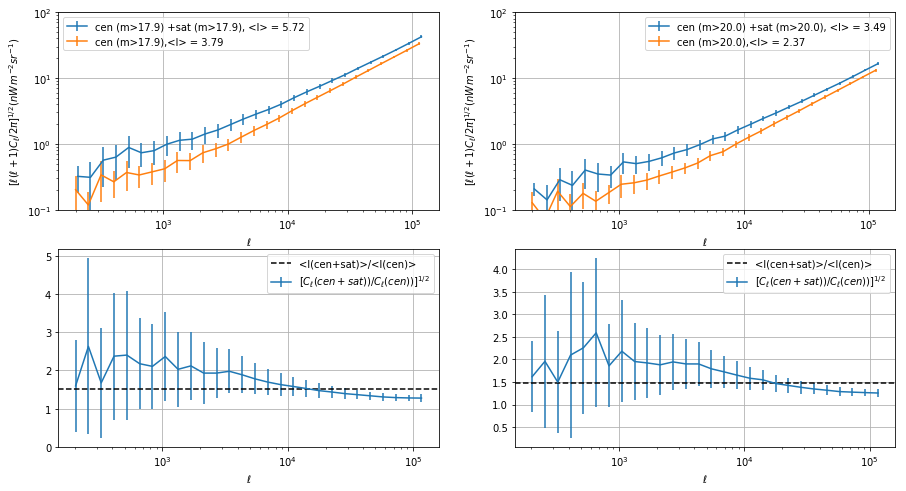

In [155]:
icat = 0

fig, ax = plt.subplots(2,2, figsize=(15,8))
for i,mag_th in enumerate([17 - 2.5*np.log10(1594./3631.),20]):
    df = get_micecat_df(icat)

    xs, ys, ms = np.array(df['x']), np.array(df['y']), np.array(df['I'])
    ms_inband = np.array(df['I']) if inst==1 else np.array(df['H'])

    make_srcmap_class = make_srcmap(inst)
    make_srcmap_class.ms = ms
    make_srcmap_class.ms_inband = ms
    make_srcmap_class.xls = xs
    make_srcmap_class.yls = ys
    srcmap_all = make_srcmap_class.run_srcmap_nopsf()

    make_srcmap_class = make_srcmap(inst)
    make_srcmap_class.ms = ms
    make_srcmap_class.ms_inband = ms
    make_srcmap_class.xls = xs
    make_srcmap_class.yls = ys
    srcmap_all = make_srcmap_class.run_srcmap_nopsf()

    make_srcmap_class = make_srcmap(inst)
    spf = np.where(df['I']>mag_th)[0]
    make_srcmap_class.ms = ms[spf]
    make_srcmap_class.ms_inband = ms[spf]
    make_srcmap_class.xls = xs[spf]
    make_srcmap_class.yls = ys[spf]
    srcmap = make_srcmap_class.run_srcmap_nopsf()

    df = df[df['flag_central']==0]
    xs, ys, ms = np.array(df['x']), np.array(df['y']), np.array(df['I'])
    ms_inband = np.array(df['I']) if inst==1 else np.array(df['H'])

    make_srcmap_class = make_srcmap(inst)
    spf = np.where(df['I']>mag_th)[0]
    make_srcmap_class.ms = ms[spf]
    make_srcmap_class.ms_inband = ms[spf]
    make_srcmap_class.xls = xs[spf]
    make_srcmap_class.yls = ys[spf]
    srcmapc = make_srcmap_class.run_srcmap_nopsf()
    
    l,Cl, Clerr = get_power_spec(srcmap)
    l,Clc, Clcerr = get_power_spec(srcmapc)
    Dl = np.sqrt(Cl*l*(l+1)/2/np.pi)
    Dlc = np.sqrt(Clc*l*(l+1)/2/np.pi)
    Dlerr = np.sqrt(Clerr*l*(l+1)/2/np.pi)
    Dlcerr = np.sqrt(Clcerr*l*(l+1)/2/np.pi)

    ax[0][i].errorbar(l*1.02, Dl, Dlerr, label='cen (m>%.1f) +sat (m>%.1f), <I> = %.2f'\
                   %(mag_th, mag_th, np.mean(srcmap)))
    ax[0][i].errorbar(l*0.98, Dlc, Dlcerr, label='cen (m>%.1f),<I> = %.2f'%(mag_th, np.mean(srcmapc)))
    ax[0][i].set_xscale('log')
    ax[0][i].set_yscale('log')
    ax[0][i].set_ylim([1e-1,1e2])
    ax[0][i].set_xlabel(r'$\ell$')
    ax[0][i].set_ylabel(r'$[ \ell(\ell+1)C_\ell/2\pi ]^{1/2}( nW\,m^{-2} sr^{-1})$')
    ax[0][i].legend()
    ax[0][i].grid()

    ratio = Dl/Dlc
    ratio_err = ratio*np.sqrt((Dlerr/Dl)**2 + (Dlcerr/Dlc)**2)
    ax[1][i].errorbar(l, ratio, ratio_err, label=r'$[C_\ell (cen+sat))/C_\ell(cen))]^{1/2}$')
    ax[1][i].axhline(np.mean(srcmap)/np.mean(srcmapc),c='k', ls='--',
                     label='<I(cen+sat)>/<I(cen)>')
    ax[1][i].set_xscale('log')
    ax[1][i].set_xlabel(r'$\ell$')
    ax[1][i].legend()
    ax[1][i].grid()
    
fig.savefig('/Users/ytcheng/Desktop/power_spec.png',
             dpi = 150, bbox_inches='tight')

In [57]:
df = pd.DataFrame()
for icat in range(90):
    dfi = get_micecat_df(icat, add_Rvir=True)
    df = df.append(dfi)
clear_output()

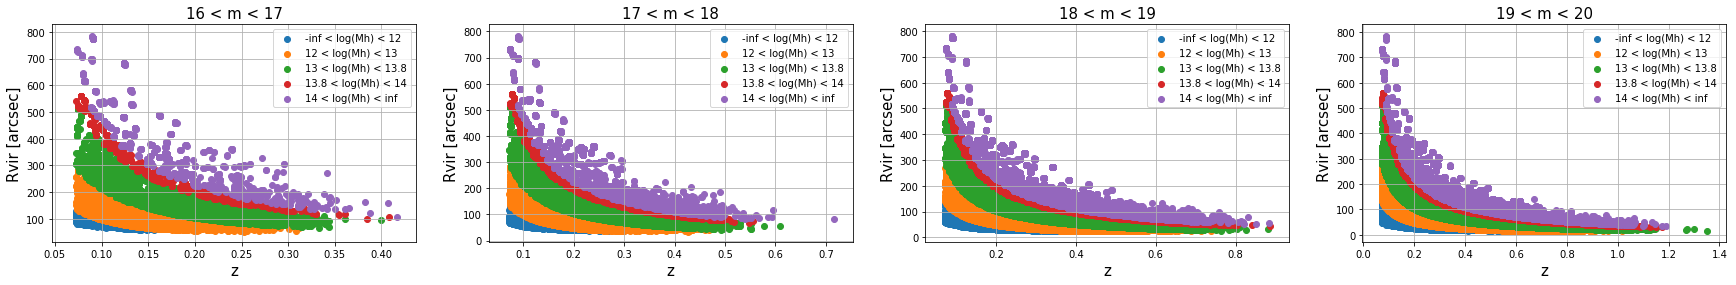

In [64]:
fig, ax = plt.subplots(1,4, figsize=(30,4))
lnmh_binedges = [-np.inf, 12, 13, 13.8, 14, np.inf]
for i,(m_min, m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
    dfi = df[(df['I']>=m_min) & (df['I']<m_max)]
    for mh_min, mh_max in zip(lnmh_binedges[:-1], lnmh_binedges[1:]):
        label = '{} < log(Mh) < {}'.format(mh_min, mh_max)
        sp = np.where((dfi['lmhalo'] > mh_min) & (dfi['lmhalo'] < mh_max))[0]
        ax[i].scatter(dfi['z_cgal'].iloc[sp], dfi['Rv_arcsec'].iloc[sp], label=label)
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('z', fontsize=15)
    ax[i].set_ylabel('Rvir [arcsec]',fontsize=15)
    ax[i].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
fig.savefig('/Users/ytcheng/Desktop/Rv_mbins.png',
             dpi = 150, bbox_inches='tight')

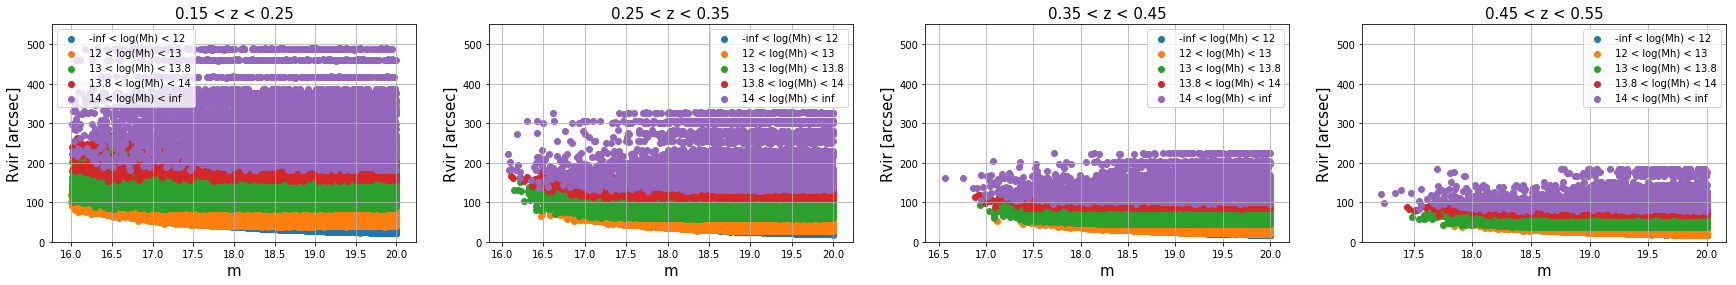

In [63]:
fig, ax = plt.subplots(1,4, figsize=(30,4))
z_min_arr = [0.15,0.25,0.35,0.45]
z_max_arr = [0.25,0.35,0.45,0.55]
for i,(z_min, z_max) in enumerate(zip(z_min_arr, z_max_arr)):
    dfi = df[(df['I']>=16) & (df['I']<20) & (df['z_cgal']>z_min) & (df['z_cgal']<z_max)]
    for mh_min, mh_max in zip(lnmh_binedges[:-1], lnmh_binedges[1:]):
        label = '{} < log(Mh) < {}'.format(mh_min, mh_max)
        sp = np.where((dfi['lmhalo'] > mh_min) & (dfi['lmhalo'] < mh_max))[0]
        ax[i].scatter(dfi['I'].iloc[sp], dfi['Rv_arcsec'].iloc[sp],label=label)
        
    ax[i].grid()
    ax[i].legend()
    ax[i].set_title('%.2f < z < %.2f'%(z_min, z_max), fontsize=15)
    ax[i].set_xlabel('m',fontsize=15)
    ax[i].set_ylabel('Rvir [arcsec]',fontsize=15)
    ax[i].set_ylim([0,550])
fig.savefig('/Users/ytcheng/Desktop/Rv_zbins.png',
             dpi = 150, bbox_inches='tight')

In [1]:
from micecat import *
inst = 1
icat = 0
data_dict = run_micecat_1h(inst, icat, Nstack=2, zcut=0.2, save_data=True)

MICECAT field 0, 0 < ra < 2, 0 < dec < 2
stack 1-halo, icat 0, 16 < m < 17, 0 / 46, 71 sats, t = 0.00 min
stack 1-halo, icat 0, 17 < m < 18, 0 / 514, 57 sats, t = 0.00 min
stack 1-halo, icat 0, 18 < m < 19, 0 / 2563, 2 sats, t = 0.00 min
stack 1-halo, icat 0, 19 < m < 20, 0 / 8121, 2 sats, t = 0.00 min


(0.5, 1500.0)

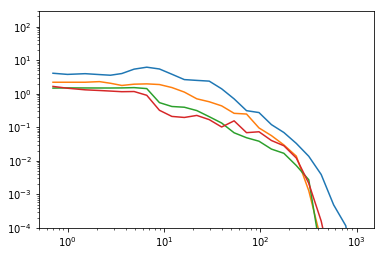

In [14]:
plt.loglog(data_dict['rbins'],data_dict['data'][0])
plt.loglog(data_dict['rbins'],data_dict['data'][1])
plt.loglog(data_dict['rbins'],data_dict['data'][2])
plt.loglog(data_dict['rbins'],data_dict['data'][3])
plt.ylim([1e-4,3e2])
plt.xlim([5e-1,1.5e3])

/Users/ytcheng/ciber/python_ciber/stack_modelfit/micecat.py:451: RuntimeWarning: divide by zero encountered in log10
  .format(inst, icat, R200cut, np.log10(Mhcut))


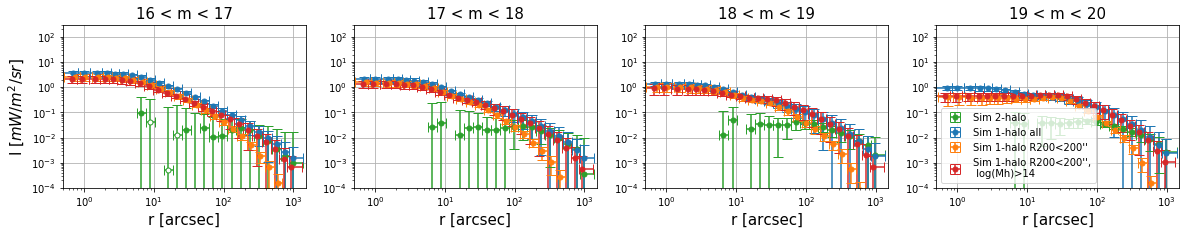

In [12]:
from utils import *
from micecat import *

for inst in [1]:
    fig, ax = plt.subplots(1, 4, figsize = (20,3))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen(inst, im, filt_order=2, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[im], color='C2',label='Sim 2-halo')

        rbins, mc_avg, mc_std, _ = get_micecat_sim_1h(inst, im, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[im], color='C0',label='Sim 1-halo all')
        
        _, mc_avg, mc_std, _ = get_micecat_sim_1h(inst, im, R200cut=200, Mhcut=0, sub=False)
        plot_err_log(rbins*1.05, 
                 mc_avg, mc_std,
                 ax=ax[im], color='C1',label='Sim 1-halo R200<200\'\'')

        _, mc_avg, mc_std, _ = get_micecat_sim_1h(inst, im, R200cut=200, Mhcut=1e14, sub=False)
        plot_err_log(rbins*0.95, 
                 mc_avg, mc_std,
                 ax=ax[im], color='C3',label='Sim 1-halo R200<200\'\',\n log(Mh)>14')


        ax[im].set_ylim([1e-4,3e2])
        ax[im].set_xlim([5e-1,1.5e3])
        ax[im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[im].grid()    
        ax[im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[-1].legend(fontsize=10)
fig.savefig('/Users/ytcheng/Desktop/clus_models.png',
             dpi = 150, bbox_inches='tight')

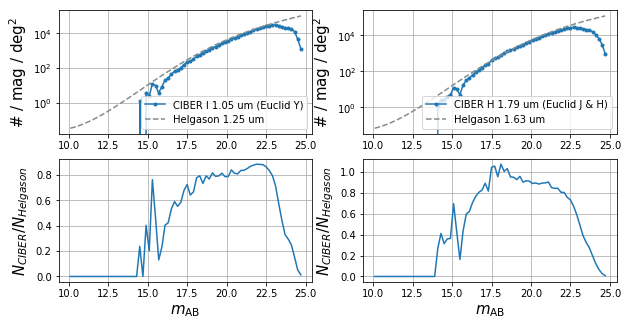

In [117]:
# icat = 0
# df = get_micecat_df(icat)
fig, ax = plt.subplots(2, 2, figsize = (10,5))

dm = 0.2
mbinedges = np.arange(10,25,dm)
mbins = (mbinedges[1:] + mbinedges[:-1]) / 2

histI_arr = np.histogram(df['I'].values, mbinedges)[0] / 4 / dm
ax[0][0].semilogy(mbins,histI_arr, '.-', label = 'CIBER I 1.05 um (Euclid Y)')
helgdir = '/Users/ytcheng/ciber/doc/20170904_External/helgason/'
helgdat = np.loadtxt(helgdir + 'Helgason125.txt', skiprows=1, delimiter=',')
helgI = np.exp(np.polyval(np.polyfit(helgdat[:,0], np.log(helgdat[:,1]), 5), mbins))
ax[0][0].plot(mbins, helgI, '--', c = '#838B8B', label = 'Helgason 1.25 um')
ax[1][0].plot(mbins, histI_arr/helgI)
ax[0][0].set_ylabel(r'# / mag / deg$^2$', fontsize = 15)
ax[0][0].legend()
ax[0][0].grid()
ax[1][0].set_ylabel('$N_{CIBER}/N_{Helgason}$', fontsize = 15)
ax[1][0].set_xlabel(r'$m_{\rm AB}$', fontsize = 15)
ax[1][0].grid()


histH_arr = np.histogram(df['H'].values, mbinedges)[0] / 4 / dm
ax[0][1].semilogy(mbins,histH_arr, '.-', label = 'CIBER H 1.79 um (Euclid J & H)')
helgdir = '/Users/ytcheng/ciber/doc/20170904_External/helgason/'
helgdat = np.loadtxt(helgdir + 'Helgason163.txt', skiprows=1, delimiter=',')
helgH = np.exp(np.polyval(np.polyfit(helgdat[:,0], np.log(helgdat[:,1]), 5), mbins))
ax[0][1].plot(mbins, helgH, '--', c = '#838B8B', label = 'Helgason 1.63 um')
ax[1][1].plot(mbins, histH_arr/helgH)
ax[0][1].set_ylabel(r'# / mag / deg$^2$', fontsize = 15)
ax[0][1].legend()
ax[0][1].grid()
ax[1][1].set_ylabel('$N_{CIBER}/N_{Helgason}$', fontsize = 15)
ax[1][1].set_xlabel(r'$m_{\rm AB}$', fontsize = 15)
ax[1][1].grid()

fig.savefig('/Users/ytcheng/Desktop/Helgson_micecat.pdf',
             dpi = 150, bbox_inches='tight')

In [66]:
class Helgason_bands_class:
    
    '''
    Helgason et al. 2012 table 2
    https://ui.adsabs.harvard.edu/#abs/2012ApJ...752..113H/abstract
    '''
    
    def __init__(self,idx):
        
        name_arr = ['UV','U','B','V','R','I','z','J','H','K','L','M']
        wleff_arr = [0.15,0.36,0.45,0.55,0.65,0.79,0.91,1.27,1.63,2.20,3.60,4.50]
        zmax_arr = [8.0,4.5,4.5,3.6,3.0,3.0,2.9,3.2,3.2,3.8,0.7,0.7]
        M0_arr = [-19.62,-20.20,-21.35,-22.13,-22.40,-22.80,-22.86,-23.04,-23.41,-22.97,-22.40,-21.84]
        q_arr = [1.1,1.0,0.6,0.5,0.5,0.4,0.4,0.4,0.5,0.4,0.2,0.3]
        phi0_arr = [2.43,5.46,3.41,2.42,2.25,2.05,2.55,2.21,1.91,2.74,3.29,3.29]
        p_arr = [0.2,0.5,0.4,0.5,0.5,0.4,0.4,0.6,0.8,0.8,0.8,0.8]
        alpha0_arr = [-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00]
        r_arr = [0.086,0.076,0.055,0.060,0.070,0.070,0.060,0.035,0.035,0.035,0.035,0.035]
        
        self.name = name_arr[idx]
        self.wleff = wleff_arr[idx]
        self.zmax = zmax_arr[idx]
        self.M0 = M0_arr[idx]
        self.q = q_arr[idx]
        self.phi0 = phi0_arr[idx]
        self.p = p_arr[idx]
        self.alpha0 = alpha0_arr[idx]
        self.r = r_arr[idx]
        
        self._name_arr = np.asarray(name_arr)
        self._wleff_arr = np.asarray(wleff_arr)
        self._zmax_arr = np.asarray(zmax_arr)
        self._M0_arr = np.asarray(M0_arr)
        self._q_arr = np.asarray(q_arr)
        self._phi0_arr = np.asarray(phi0_arr)
        self._p_arr = np.asarray(p_arr)
        self._alpha0_arr = np.asarray(alpha0_arr)
        self._r_arr = np.asarray(r_arr)

def Helgason_LF(z, M_arr, bandidx):
    '''
    Helgason + 2012
    rest frame luminosity function [#/mag/Mpc^3].
    Helgason eq 1, eq 3~5, table 2
    '''
    params = Helgason_bands_class(bandidx)
    Mstr = params.M0 - 2.5 * np.log10((1 + (z - 0.8))**params.q)
    phistr = params.phi0 * np.exp(-params.p * (z - 0.8)) * 1e-3
    alpha = params.alpha0 * (z / 0.01)**params.r
    phi_arr = 0.4 * np.log(10) * phistr * (10**(0.4 * (Mstr - M_arr)))**(alpha + 1) \
            * np.exp(-10**(0.4 * (Mstr - M_arr)))
    return phi_arr

def Helgason_LFcum(z, M_arr, bandidx, dM = 0.01):
    '''
    dN(<M)/dV[1/Mpc^3]
    '''
    M1_arr = np.arange(M_arr[0]-1, M_arr[-1] + dM, dM)
    phi_arr = Helgason_LF(z, M1_arr, bandidx)
    phicum_arr = [np.sum(phi_arr[M1_arr < Mi]) for Mi in M_arr]
    phicum_arr = np.asarray(phicum_arr) * dM
    return phicum_arr

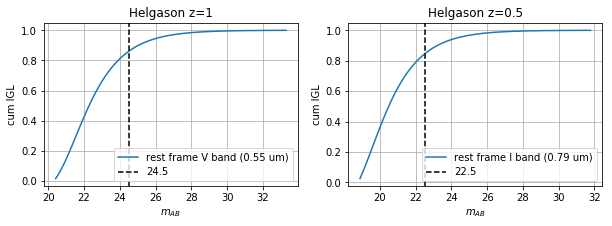

In [118]:
fig, ax = plt.subplots(1, 2, figsize = (10,3))

M_arr = np.arange(-23,-10,0.1)

z = 1
DM = 5 * np.log10((cosmo.luminosity_distance(z) / (10 * u.pc)).decompose())
M0 = Helgason_bands_class(3).M0
m0 = M0 + DM - (2.5 * np.log10(1 + z))

m_arr = M_arr + DM - (2.5 * np.log10(1 + z))
phi_arr = Helgason_LF(z, M_arr, 3)
ax[0].plot(m_arr, np.cumsum(phi_arr*10**(-m_arr/2.5))/np.cumsum(phi_arr*10**(-m_arr/2.5))[-1],
          label='rest frame %s band (%.2f um)'%(Helgason_bands_class(3).name, 
                                                Helgason_bands_class(3).wleff))
ax[0].axvline(24.5, c='k',ls='--',label='24.5')
ax[0].set_xlabel('$m_{AB}$')
ax[0].set_ylabel('cum IGL')
ax[0].set_title('Helgason z={}'.format(z))
ax[0].legend()
ax[0].grid()

z = 0.5
DM = 5 * np.log10((cosmo.luminosity_distance(z) / (10 * u.pc)).decompose())
M0 = Helgason_bands_class(4).M0
m0 = M0 + DM - (2.5 * np.log10(1 + z))

m_arr = M_arr + DM - (2.5 * np.log10(1 + z))
phi_arr = Helgason_LF(z, M_arr, 5)
ax[1].plot(m_arr, np.cumsum(phi_arr*10**(-m_arr/2.5))/np.cumsum(phi_arr*10**(-m_arr/2.5))[-1],
          label='rest frame %s band (%.2f um)'%(Helgason_bands_class(5).name, 
                                                Helgason_bands_class(5).wleff))
ax[1].axvline(22.5, c='k',ls='--',label='22.5')
ax[1].set_xlabel('$m_{AB}$')
ax[1].set_ylabel('cum IGL')
ax[1].set_title('Helgason z={}'.format(z))
ax[1].legend()
ax[1].grid()

fig.savefig('/Users/ytcheng/Desktop/Helgson_cumsum.pdf',
             dpi = 150, bbox_inches='tight')